In [27]:
import pandas as pd
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

In [28]:
# urlav = "https://raw.githubusercontent.com/olagit/Structure-vs-properties-of-compounds/main/data/Avalon.csv"
# avalon = pd.read_csv(urlav)

urlmor = "https://raw.githubusercontent.com/olagit/Structure-vs-properties-of-compounds/main/data/Morgan.csv"
morgan = pd.read_csv(urlmor)

# urlmac = "https://raw.githubusercontent.com/olagit/Structure-vs-properties-of-compounds/main/data/maccs.csv"
# maccs = pd.read_csv(urlmac)

In [29]:
morgan.head()

,index,logP,smiles,fp0,fp1,fp2,fp3,fp4,fp5,fp6,...,fp1014,fp1015,fp1016,fp1017,fp1018,fp1019,fp1020,fp1021,fp1022,fp1023
0,0,-0.77,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,-3.30,Cc1occc1C(=O)Nc2ccccc2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,-2.06,CC(C)=CCCC(C)=CC(=O),0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,3,-7.87,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,-1.33,c1ccsc1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
morgan.shape

(1128, 1027)

In [31]:
morgan_fps = morgan.iloc[:,3:515].values

morgan_logps = morgan.iloc[:,1].values

morgan_logps_fps = morgan.drop(['index', 'smiles'], axis=1)

In [32]:
morgan_fps.shape

(1128, 512)

In [33]:
from rdkit import Chem
from rdkit.Chem import ChemicalFeatures
from rdkit import RDConfig

In [34]:
import os
fdefName = os.path.join(RDConfig.RDDataDir,'BaseFeatures.fdef')
factory = ChemicalFeatures.BuildFeatureFactory(fdefName)

In [35]:
import numpy as np

morgan['Donor'] = np.zeros(morgan.shape[0], dtype=int)
morgan['Acceptor'] = np.zeros(morgan.shape[0], dtype=int)
morgan['Aromatic'] = np.zeros(morgan.shape[0], dtype=int)
morgan['Hydrophobe'] = np.zeros(morgan.shape[0], dtype=int)
morgan['LumpedHydrophobe'] = np.zeros(morgan.shape[0], dtype=int)

In [36]:
for i in range(morgan.shape[0]):
    m = Chem.MolFromSmiles(morgan['smiles'][i])
    feats = factory.GetFeaturesForMol(m)
    if feats:
        for j in range(len(feats)):
            if feats[j].GetFamily() == 'Donor':
                morgan.loc[i, 'Donor'] += 1
            elif feats[j].GetFamily() == 'Acceptor':
                morgan.loc[i, 'Acceptor'] += 1
            elif feats[j].GetFamily() == 'Aromatic':
                morgan.loc[i, 'Aromatic'] += 1
            elif feats[j].GetFamily() == 'Hydrophobe':
                morgan.loc[i, 'Hydrophobe'] += 1
            elif feats[j].GetFamily() == 'LumpedHydrophobe':
                morgan.loc[i, 'LumpedHydrophobe'] += 1
                
morgan.head()

,index,logP,smiles,fp0,fp1,fp2,fp3,fp4,fp5,fp6,...,fp1019,fp1020,fp1021,fp1022,fp1023,Donor,Acceptor,Aromatic,Hydrophobe,LumpedHydrophobe
0,0,-0.77,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...,0,1,0,0,1,0,0,...,1,0,0,0,0,7,11,1,1,1
1,1,-3.30,Cc1occc1C(=O)Nc2ccccc2,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,2,1,1
2,2,-2.06,CC(C)=CCCC(C)=CC(=O),0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,6,0
3,3,-7.87,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5,8,5
4,4,-1.33,c1ccsc1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [37]:
from scipy.spatial.distance import squareform
from scipy.spatial.distance import pdist, jaccard

res = 1 - pdist(morgan_fps, 'jaccard')
squareform(res)
morgan_distance = pd.DataFrame(squareform(res), index=morgan.index, columns= morgan.index)

morgan_distance

,0,1,2,3,4,5,6,7,8,9,...,1118,1119,1120,1121,1122,1123,1124,1125,1126,1127
0,0.000000,0.114286,0.057143,0.137931,0.035714,0.088235,0.064516,0.048780,0.029412,0.020000,...,0.060606,0.032258,0.027778,0.178571,0.066667,0.034483,0.026316,0.028571,0.068966,0.025641
1,0.114286,0.000000,0.040000,0.157895,0.058824,0.130435,0.100000,0.066667,0.043478,0.052632,...,0.043478,0.050000,0.040000,0.157895,0.166667,0.000000,0.120000,0.041667,0.052632,0.115385
2,0.057143,0.040000,0.000000,0.052632,0.000000,0.000000,0.000000,0.071429,0.000000,0.085714,...,0.157895,0.055556,0.000000,0.000000,0.055556,0.000000,0.040000,0.095238,0.125000,0.038462
3,0.137931,0.157895,0.052632,0.000000,0.090909,0.176471,0.142857,0.040000,0.058824,0.030303,...,0.058824,0.000000,0.052632,0.230769,0.153846,0.000000,0.000000,0.055556,0.166667,0.045455
4,0.035714,0.058824,0.000000,0.090909,0.000000,0.066667,0.090909,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.066667,0.090909,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1123,0.034483,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,...,0.071429,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.052632
1124,0.026316,0.120000,0.040000,0.000000,0.000000,0.000000,0.047619,0.032258,0.000000,0.025641,...,0.043478,0.050000,0.000000,0.000000,0.050000,0.000000,0.000000,0.086957,0.052632,0.035714
1125,0.028571,0.041667,0.095238,0.055556,0.000000,0.045455,0.000000,0.035714,0.000000,0.027778,...,0.105263,0.058824,0.000000,0.000000,0.058824,0.000000,0.086957,0.000000,0.214286,0.083333
1126,0.068966,0.052632,0.125000,0.166667,0.000000,0.000000,0.000000,0.043478,0.000000,0.032258,...,0.333333,0.300000,0.000000,0.000000,0.083333,0.100000,0.052632,0.214286,0.000000,0.050000


In [38]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(affinity='precomputed', n_clusters=30, linkage='complete').fit(morgan_distance)
print(model.labels_)

[ 5 16 19 ... 28 16 15]


In [39]:
morgan['Agglomerative'] = model.labels_
morgan

,index,logP,smiles,fp0,fp1,fp2,fp3,fp4,fp5,fp6,...,fp1020,fp1021,fp1022,fp1023,Donor,Acceptor,Aromatic,Hydrophobe,LumpedHydrophobe,Agglomerative
0,0,-0.770,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...,0,1,0,0,1,0,0,...,0,0,0,0,7,11,1,1,1,5
1,1,-3.300,Cc1occc1C(=O)Nc2ccccc2,0,0,0,0,0,0,0,...,0,0,0,0,1,1,2,1,1,16
2,2,-2.060,CC(C)=CCCC(C)=CC(=O),0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,6,0,19
3,3,-7.870,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43,0,0,0,0,0,0,0,...,0,0,0,0,0,0,5,8,5,0
4,4,-1.330,c1ccsc1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1123,1123,-1.710,FC(F)(F)C(Cl)Br,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,4
1124,1124,0.106,CNC(=O)ON=C(SC)C(=O)N(C)C,0,0,0,0,0,0,0,...,0,0,0,0,2,3,0,0,0,23
1125,1125,-3.091,CCSCCSP(=S)(OC)OC,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,3,0,28
1126,1126,-3.180,CCC(C)C,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,2,1,16


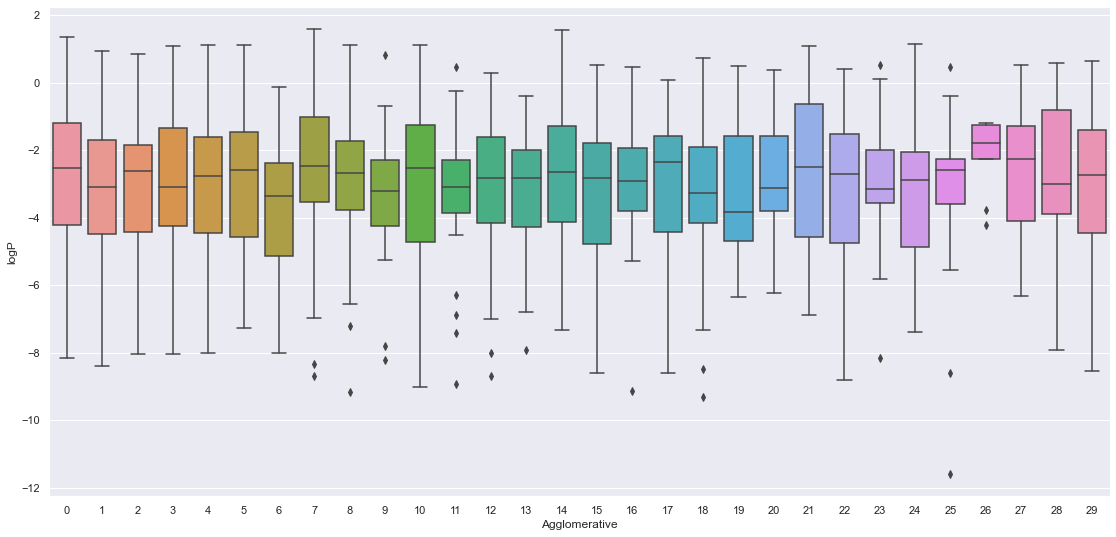

In [42]:
import seaborn as sns

sns.boxplot(x=morgan['Agglomerative'], y=morgan['logP'], data=morgan)
sns.set(rc={'figure.figsize':(19,9)})

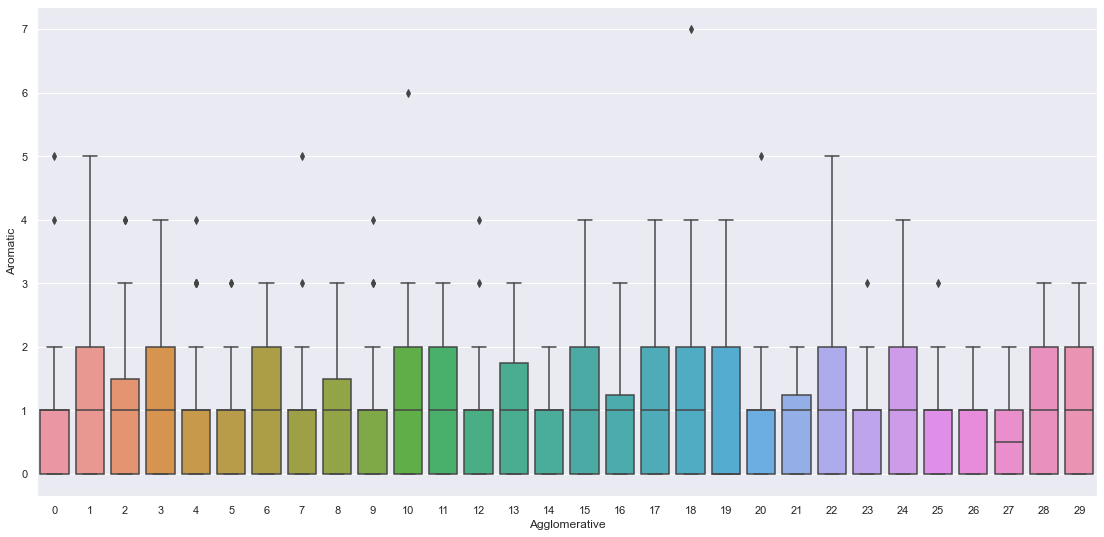

In [43]:
sns.boxplot(x=morgan['Agglomerative'], y=morgan['Aromatic'], data=morgan)
sns.set(rc={'figure.figsize':(19,9)})

In [44]:
morgan_lowlogp_dm = morgan[['fp49','fp139','fp84','fp151']].copy()
morgan_lowlogp = morgan[['fp49','fp139','fp84','fp151', 'logP', 'Hydrophobe']].copy()

res = 1 - pdist(morgan_lowlogp_dm, 'jaccard')
squareform(res)
morgan_distance = pd.DataFrame(squareform(res), index=morgan_lowlogp_dm.index, columns= morgan_lowlogp_dm.index)

model = AgglomerativeClustering(affinity='precomputed', n_clusters=20, linkage='complete').fit(morgan_distance)

model.labels_

array([0, 0, 0, ..., 8, 2, 4])

In [45]:
morgan_lowlogp['Agglomerative'] = model.labels_
# morgan_lowlogp['logP'] = morgan[['logP']].values
# morgan_lowlogp['Hydrophobe'] = morgan[['Hydrophobe']].values
morgan_lowlogp[500:700]

,fp49,fp139,fp84,fp151,logP,Hydrophobe,Agglomerative
500,0,0,0,1,-6.34,3,0
501,0,0,0,0,-4.07,2,0
502,0,0,0,0,-2.82,2,0
503,0,0,0,0,-3.48,2,0
504,0,0,0,0,-2.56,1,0
...,...,...,...,...,...,...,...
695,0,0,1,0,-3.85,7,0
696,0,1,0,0,-4.16,0,0
697,0,0,0,0,-3.11,3,0
698,0,0,0,0,-2.24,2,0


In [50]:
from sklearn.neighbors import NearestNeighbors

neighb = NearestNeighbors(n_neighbors=2)
nbrs = neighb.fit(morgan_fps) 
distances, indices = nbrs.kneighbors(morgan_fps)

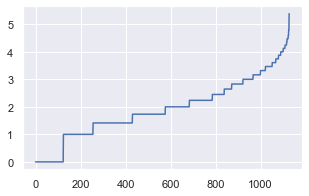

In [51]:
import matplotlib.pyplot as plt
import numpy as np

distances = np.sort(distances, axis = 0) 
distances = distances[:, 1] 
plt.rcParams['figure.figsize'] = (5,3) 
plt.plot(distances) 
plt.show()

In [52]:
from sklearn.cluster import DBSCAN

morgan_fps = morgan.iloc[:,3:515].values
dbscan = DBSCAN(eps=0.3, min_samples=2, algorithm='auto', metric='jaccard').fit(morgan_fps)
clus_set = set(dbscan.labels_)
unique = len(clus_set)
unique

labels = dbscan.labels_ 
labels[6:600]

array([  1,   2,  -1,  -1,  -1,  -1,  -1,   3,   4,   5,   5,  -1,  -1,
         5,   6,  -1,   7,   8,  -1,   9,  -1,  10,  -1,  11,  12,  -1,
        -1,  -1,  -1,  13,  -1,  -1,  -1,   4,  -1,  -1,  14,  -1,  -1,
         5,  15,  16,  -1,  -1,   4,  -1,   0,  -1,  -1,  17,  -1,  17,
         0,  -1,  -1,  18,  19,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,
        -1,  -1,  -1,  20,  -1,  21,  -1,  22,  -1,  -1,  23,  -1,  24,
        25,  -1,  -1,  -1,  -1,  -1,  -1,  10,  26,  -1,  -1,  -1,  -1,
        -1,  -1,  27,  28,  -1,  -1,  -1,  25,  -1,  29,  -1,   5,  -1,
        30,  -1,   4,  -1,  -1,  -1,  -1,  -1,  31,  32,  -1,  -1,  33,
        34,  35,  -1,  -1,  36,  -1,  22,  -1,  -1,  -1,  -1,  -1,  37,
        -1,  14,  38,  39,  40,  -1,  -1,  -1,  34,  -1,  -1,  10,   4,
        -1,  -1,  34,   9,  41,  -1,  42,  -1,  -1,  43,  -1,  -1,  -1,
        13,  44,  -1,  -1,  32,  21,  -1,  45,  -1,  -1,  -1,  46,  -1,
        21,  -1,  10,  -1,  -1,   5,  -1,  -1,  -1,  -1,  28,  -

In [53]:
from sklearn.manifold import TSNE

morgan_m = TSNE(learning_rate=50, perplexity=20)
morgan_tsne_fts = morgan_m.fit_transform(morgan_fps)
morgan_tsne_fts

array([[  0.18869397,   8.5832205 ],
       [  5.513328  ,  40.471344  ],
       [  8.736032  , -27.897526  ],
       ...,
       [ 39.258537  ,   2.121423  ],
       [ 21.379663  , -12.433558  ],
       [-32.53959   ,   2.7943573 ]], dtype=float32)

In [54]:
morgan_tsne_fts_df = pd.DataFrame(morgan_tsne_fts, columns=['x', 'y'])
morgan_tsne_fts_df['logP'] = morgan_logps
morgan_tsne_fts_df

,x,y,logP
0,0.188694,8.583220,-0.770
1,5.513328,40.471344,-3.300
2,8.736032,-27.897526,-2.060
3,-21.406948,41.799664,-7.870
4,-4.882504,-4.146213,-1.330
...,...,...,...
1123,0.177667,-17.133471,-1.710
1124,-4.145978,-25.370907,0.106
1125,39.258537,2.121423,-3.091
1126,21.379663,-12.433558,-3.180


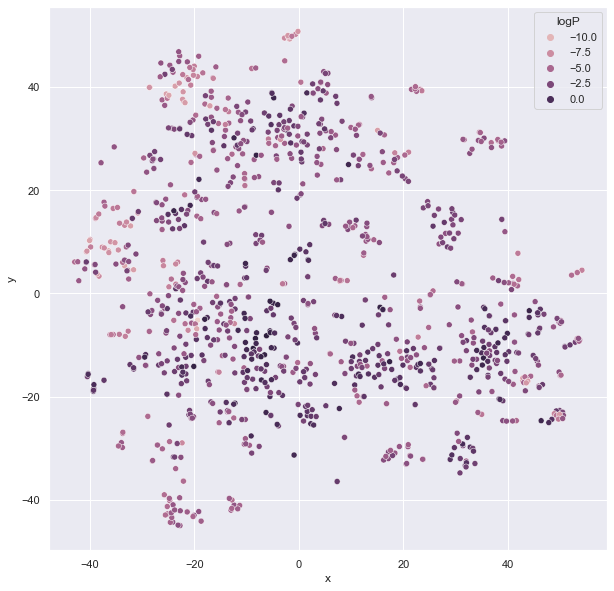

In [57]:
import seaborn as sns
from matplotlib import colors

sns.scatterplot(x='x', y='y', hue='logP', data=morgan_tsne_fts_df)
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

In [58]:
morgan_tsne_fts_df['Donor'] = morgan['Donor'].values
morgan_tsne_fts_df['Acceptor'] = morgan['Acceptor'].values
morgan_tsne_fts_df['Aromatic'] = morgan['Aromatic'].values
morgan_tsne_fts_df['Hydrophobe'] = morgan['Hydrophobe'].values
morgan_tsne_fts_df['LumpedHydrophobe'] = morgan['LumpedHydrophobe'].values
morgan_tsne_fts_df

,x,y,logP,Donor,Acceptor,Aromatic,Hydrophobe,LumpedHydrophobe
0,0.188694,8.583220,-0.770,7,11,1,1,1
1,5.513328,40.471344,-3.300,1,1,2,1,1
2,8.736032,-27.897526,-2.060,0,1,0,6,0
3,-21.406948,41.799664,-7.870,0,0,5,8,5
4,-4.882504,-4.146213,-1.330,0,0,1,0,1
...,...,...,...,...,...,...,...,...
1123,0.177667,-17.133471,-1.710,0,0,0,1,0
1124,-4.145978,-25.370907,0.106,2,3,0,0,0
1125,39.258537,2.121423,-3.091,0,2,0,3,0
1126,21.379663,-12.433558,-3.180,0,0,0,2,1


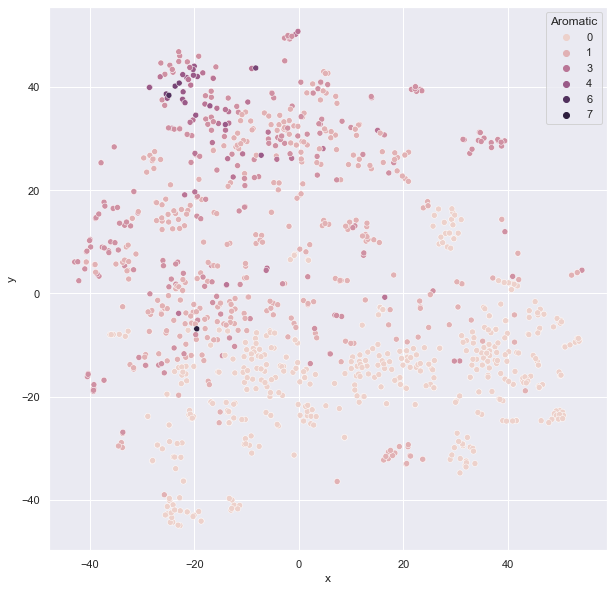

In [59]:
sns.scatterplot(x='x', y='y', hue='Aromatic', data=morgan_tsne_fts_df)
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

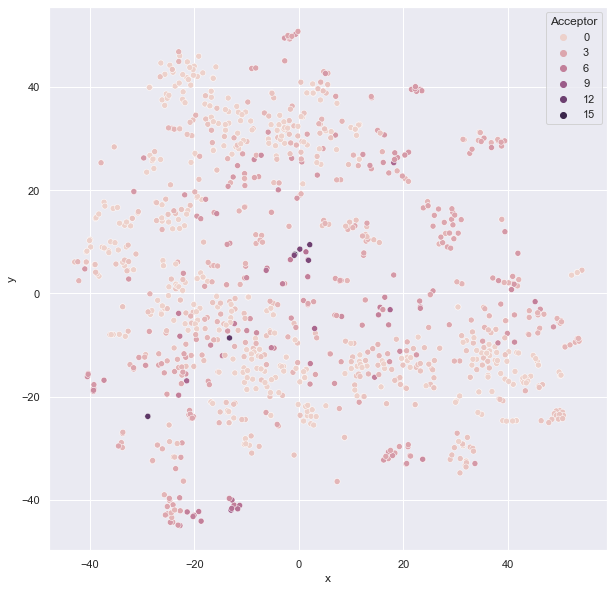

In [60]:
sns.scatterplot(x='x', y='y', hue='Acceptor', data=morgan_tsne_fts_df)
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

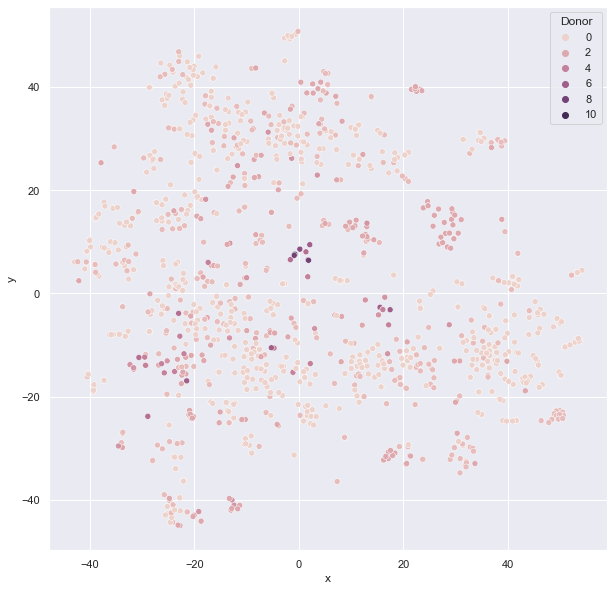

In [61]:
sns.scatterplot(x='x', y='y', hue='Donor', data=morgan_tsne_fts_df)
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

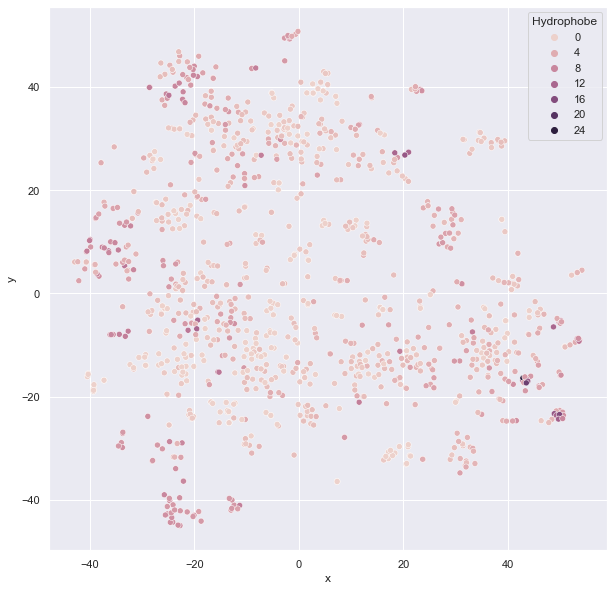

In [62]:
sns.scatterplot(x='x', y='y', hue='Hydrophobe', data=morgan_tsne_fts_df)
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

In [63]:
morgan_tsne_DB_df = pd.DataFrame(morgan_tsne_fts, columns=['x', 'y'])
morgan_tsne_DB_df['num'] = dbscan.labels_
morgan_tsne_DB_df

,x,y,num
0,0.188694,8.583220,-1
1,5.513328,40.471344,-1
2,8.736032,-27.897526,-1
3,-21.406948,41.799664,0
4,-4.882504,-4.146213,-1
...,...,...,...
1123,0.177667,-17.133471,-1
1124,-4.145978,-25.370907,-1
1125,39.258537,2.121423,7
1126,21.379663,-12.433558,5


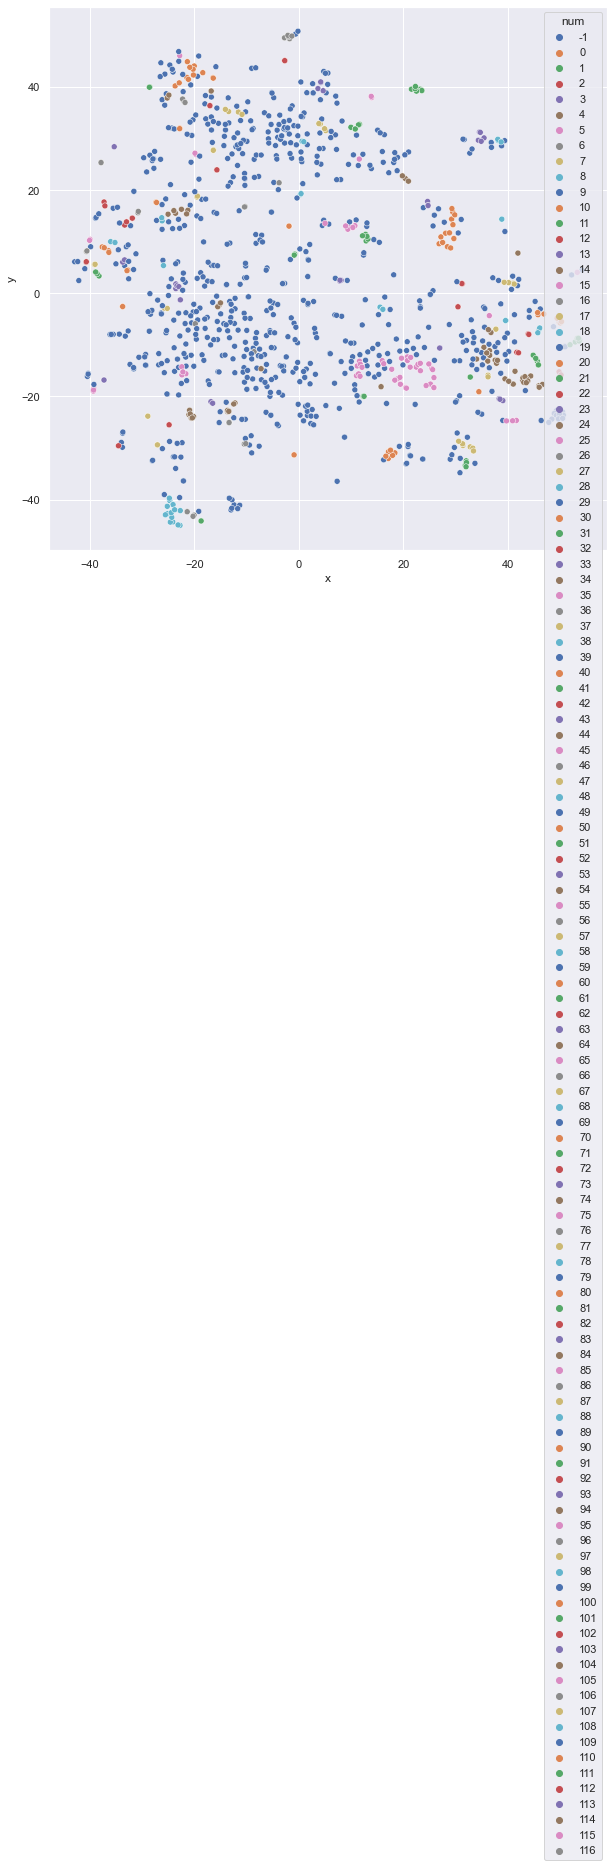

In [65]:
sns.scatterplot(x='x', y='y', hue='num', data=morgan_tsne_DB_df, palette="deep")
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

In [66]:
clustering = AgglomerativeClustering(n_clusters=9, linkage="ward").fit(morgan_tsne_fts)

morgan_tsne_AGG_df = pd.DataFrame(morgan_tsne_fts, columns=['x', 'y'])
morgan_tsne_AGG_df['num'] = clustering.labels_
morgan_tsne_AGG_df

,x,y,num
0,0.188694,8.583220,6
1,5.513328,40.471344,1
2,8.736032,-27.897526,7
3,-21.406948,41.799664,1
4,-4.882504,-4.146213,6
...,...,...,...
1123,0.177667,-17.133471,7
1124,-4.145978,-25.370907,7
1125,39.258537,2.121423,0
1126,21.379663,-12.433558,2


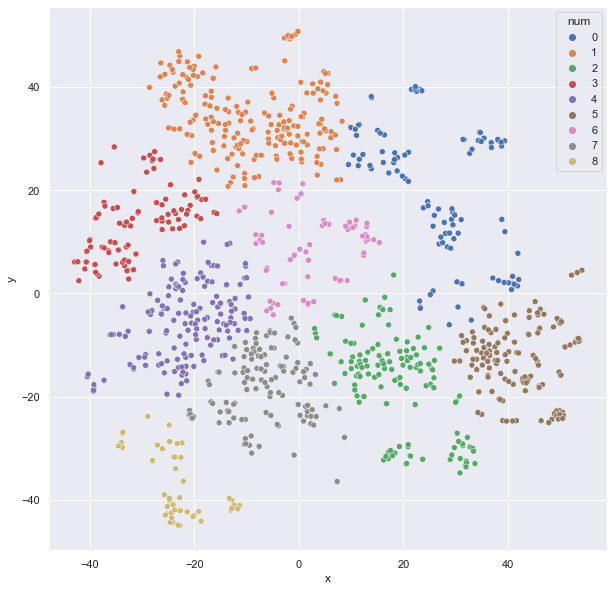

In [67]:
sns.scatterplot(x='x', y='y', hue='num', data=morgan_tsne_AGG_df, palette="deep")
plt.rcParams['figure.figsize'] = (10,10)
plt.show()